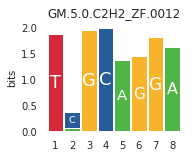

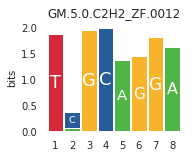

In [15]:
from matplotlib.patheffects import RendererBase
import matplotlib.pyplot as plt
import numpy as np
from gimmemotifs.motif import read_motifs
import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
from matplotlib import transforms
import matplotlib.patheffects
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
motifs = read_motifs()

%matplotlib inline
motifs[100].plot_logo()

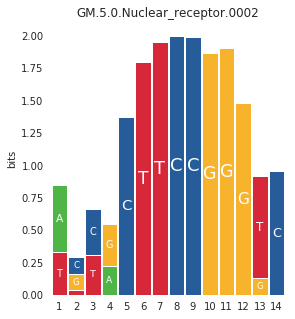

In [63]:
def plot_logo(self, fname=None, ic=True, title=True, letters=True, height=2):
    """Plot motif logo.
    
    This is an implementation of the logo presented here:
    http://www.ensembl.info/2018/10/15/new-ensembl-motif-features/
    
    Parameters
    ----------
    fname : str, optional
        If fname is set, the plot will be saved with fname as filename.
    ic : bool, optional
        Use the bit score. If this is set to False, the frequency
        will be used.
    title : bool, optional
        Plot the motif id as the title.
    letters : bool, optional
        Plot the nucleotides in the bars.
    height : float, optional
        Height of the plot.
    """   
    width = 0.94

    pfm = self.pwm
    nucs = np.array(["A", "C", "G", "T"])

    neg_matrix = np.zeros((len(pfm), 4))
    
    pos_matrix = []
    nuc_pfm = []
    for row in pfm:
        if ic:
            ylabel = "bits"
            ic_row = []
            y_max = 2
            for p in row:
                if p < 0.25:
                    ic_row.append(0)
                else:
                    ic_row.append(p * np.log2((p) / 0.25))

        else:
            ic_row = row
            ylabel = "frequency"
            y_max = 1
        idx = np.argsort(ic_row)
        pos_matrix.append(np.array(ic_row)[idx])
        nuc_pfm.append(nucs[idx])

    colors = {
        "A": (0.308, 0.709, 0.280),
        "C": (0.145,0.362, 0.6),
        "G": (0.969, 0.702, 0.172),
        "T": (0.841, 0.158, 0.224)
    }
    
    #x_max = np.max([np.sum(row) for row in pos_matrix])
    #x_min = -np.min([np.sum(row) for row in neg_matrix])
    #neg_matrix = neg_matrix / x_min * x_max
    
    fig = plt.figure(figsize=(len(pfm) * 0.3, height))
    for (sign, matrix) in [(1, pos_matrix), (-1, neg_matrix)]:
        minbottom = np.zeros(len(matrix))
        alpha = 1
        if sign == -1:
            minbottom = np.array([np.sum(row) for row in matrix])
            alpha = 0.5

        # Print the bars
        for i in range(0, len(pfm[0])):

            pheight = [abs(r[i]) for r in matrix]
            bottom= minbottom + [sum(np.abs(r[:i])) for r in matrix]

            c = [colors[r[i]] for r in nuc_pfm]
            plt.bar(range(1, len(pfm) + 1), width=width, height=pheight, bottom=bottom, 
                   color=c,
                   alpha=alpha)

        if letters:
            # Print the letters
            for i in range(len(pfm)):
                for n in range(4):
                    x = i + 1
                    y = matrix[i][n] / 2 + sum(matrix[i][:n])
                    nuc = nuc_pfm[i][n]

                    c = "white"
                    if abs(matrix[i][n]) * height >= 0.5:
                        plt.text(x, y, nuc_pfm[i][n], 
                            horizontalalignment="center",
                            verticalalignment="center",
                            fontsize=8 + 10 * (matrix[i][n] / y_max),
                            color= c,
                  )

    # Remove axis lines
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_color('none')
        
    if title:
        plt.title(self.id)
    plt.xlim(0.47, len(self) + 0.5)
    plt.xticks(range(1, len(pfm) + 1))
    plt.ylabel(ylabel)
    
    if fname:
        plt.savefig(fname, dpi=300)
        
plot_logo(motifs[5], "bla.png")

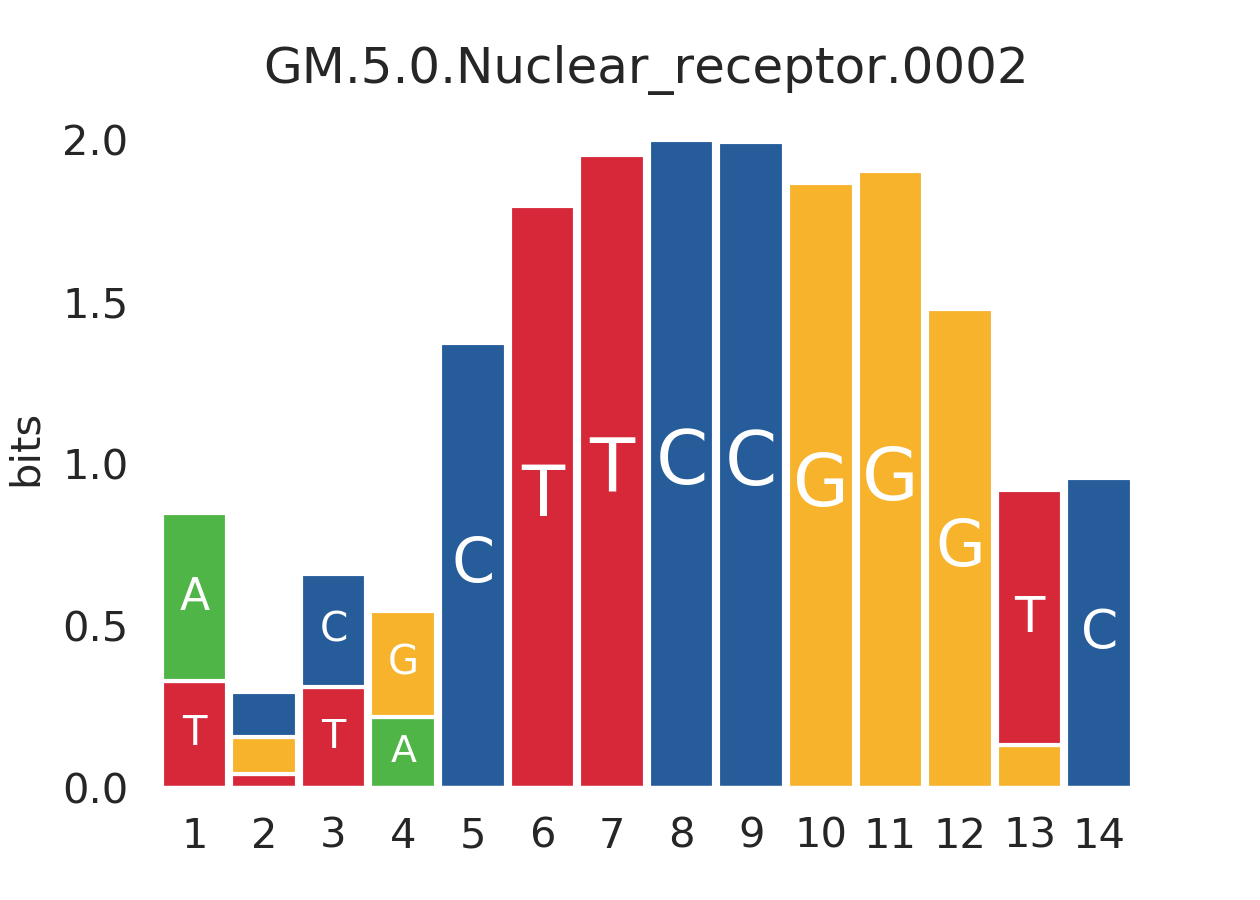

In [60]:
from IPython.display import Image
Image("bla.png")

In [86]:
COLOR_SCHEME = {"A": (0.308, 0.709, 0.280),
        "C": (0.145,0.362, 0.6),
        "G": (0.969, 0.702, 0.172),
        "T": (0.841, 0.158, 0.224)}

BASES = sorted(list(COLOR_SCHEME.keys()))

class Scale(RendererBase):
    def __init__(self, sx, sy=None):
        self._sx = sx
        self._sy = sy

    def draw_path(self, renderer, gc, tpath, affine, rgbFace):
        affine = affine.identity().scale(self._sx, self._sy)+affine
        renderer.draw_path(gc, tpath, affine, rgbFace)

def draw_logo(self, ic=True, fontfamily='Arial', size=80):
    nucs = np.array(["A", "C", "G", "T"])
    pos_matrix = []
    nuc_pfm = []
    for row in self.pwm:
        if ic:
            ylabel = "bits"
            ic_row = []
            y_max = 2
            for p in row:
                if p < 0.25:
                    ic_row.append(0)
                else:
                    ic_row.append(p * np.log2((p) / 0.25))

        else:
            ic_row = row
            ylabel = "frequency"
            y_max = 1
        idx = np.argsort(ic_row)
        pos_matrix.append(np.array(ic_row)[idx])
        nuc_pfm.append(nucs[idx])
    all_scores = [zip(nuc_pfm[i], row) for i, row in enumerate(pos_matrix)]
    
    if fontfamily == 'xkcd':
        plt.xkcd()
    else:
        plt.rcParams['font.family'] = fontfamily, "DejaVu Sans"

    fig, ax = plt.subplots(figsize=(len(all_scores), 2.5))

    font = FontProperties()
    font.set_size(size)
    font.set_weight('bold')
    
    #font.set_family(fontfamily)

    ax.set_xticks(range(1,len(all_scores)+1))    
    ax.set_yticks(range(0,3))
    ax.set_xticklabels(range(1,len(all_scores)+1), rotation=90)
    ax.set_yticklabels(np.arange(0,3,1))    
    seaborn.despine(ax=ax, trim=True)
    
    trans_offset = transforms.offset_copy(ax.transData, 
                                          fig=fig, 
                                          x=1, 
                                          y=0, 
                                          units='dots')
   
    for index, scores in enumerate(all_scores):
        yshift = 0
        for base, score in scores:
            txt = ax.text(index+1, 
                          0, 
                          base, 
                          transform=trans_offset,
                          fontsize=size, 
                          color=COLOR_SCHEME[base],
                          ha='center',
                          
                          fontproperties=font,
                          clip_on=True,

                         )
            txt.set_path_effects([Scale(1.0, score)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, 
                                                  fig=fig,
                                                  y=yshift,
                                                  units='points')
        trans_offset = transforms.offset_copy(ax.transData, 
                                              fig=fig, 
                                              x=1, 
                                              y=0, 
                                              units='points')    
    plt.show()
    if ic:
        ax.set_ylim(0,2)
    else:
        ax.set_ylim(0,1)

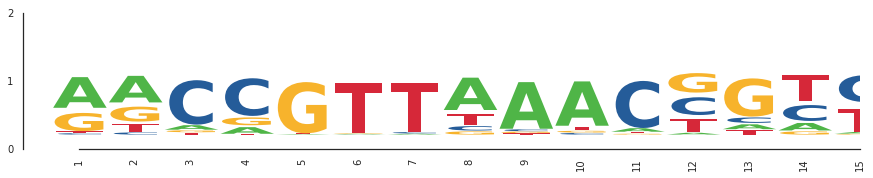

In [87]:
draw_logo(motifs[7], ic=False, size=70)

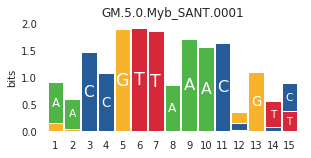

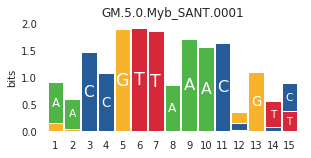

In [64]:
motifs[7].plot_logo()

In [ ]:
from gimmemotifs.fasta import Fasta
f = Fasta("/home/simon/git/gimmemotifs/tmp/test.f.txt")
from gimmemotifs.motif import read_motifs
from gimmemotifs.scanner import Scanner

In [ ]:
s = Scanner()
s.set_motifs("gimme.vertebrate.v5.0")
s.set_genome("hg38")
s.set_threshold(fpr=0.01)

In [ ]:
for x in s.count(f):
    for m,c in zip(s.motif_ids, x):
        if c > 0:
            print(m,c)

In [ ]:
motifs = read_motifs(as_dict=True)

In [ ]:
motifs["GM.5.0.C2H2_ZF.0181"].factors